In this kernel we shall look into the **Pima Indians Diabetes Database** dataset in which we shall predict possibilty of Diabetes given the different predictors. I have used 4 different classification algorithms namely:

* Logistic Regression
* KNearest Neighbours
* Support Vector Machines
* Random Forests Classifier

I have also used extensive Grid Search CV for hyperparameter tuning. Hope my notebook helps. 🤗🤗

Credits - https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that the features are centered around different means(they are at different scales and magnitudes), so we shall need to scale them

In [4]:
dfcopy = df.copy()
dfcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [71]:
# Dealing with missing data

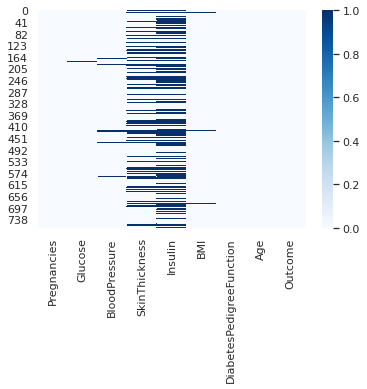

In [5]:
sns.heatmap(dfcopy.isnull(), cmap='Blues')

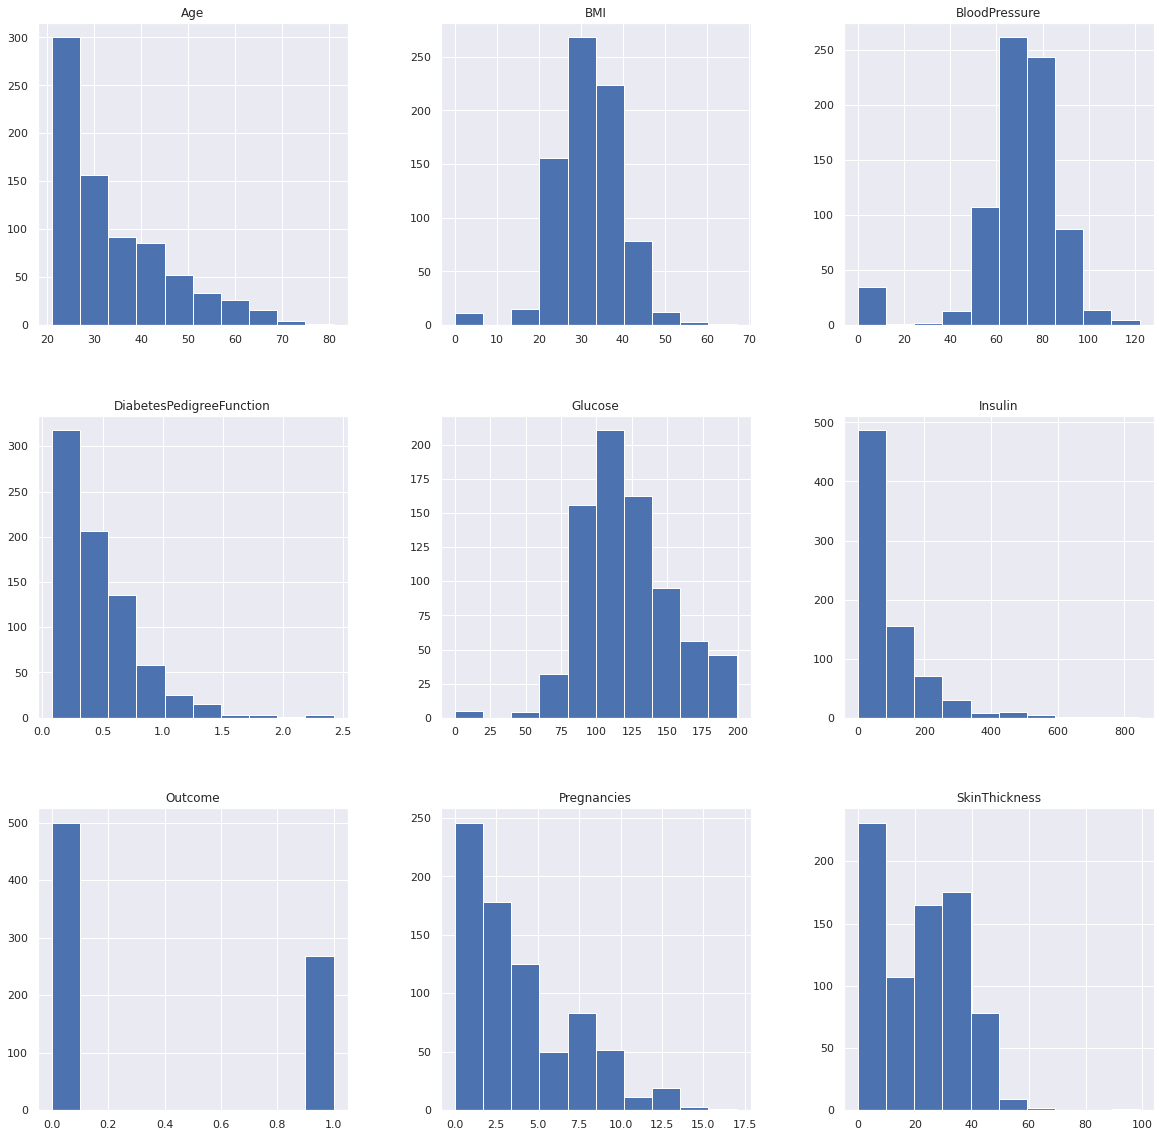

In [33]:
df.hist(figsize = (20,20))
plt.show()

In [6]:
dfcopy['Insulin'].fillna(dfcopy['Insulin'].median(), inplace=True)
dfcopy['Glucose'].fillna(dfcopy['Glucose'].mean(), inplace=True)
dfcopy['BMI'].fillna(dfcopy['BMI'].mean(), inplace=True)
dfcopy['BloodPressure'].fillna(dfcopy['BloodPressure'].mean(), inplace=True)
dfcopy['SkinThickness'].fillna(dfcopy['SkinThickness'].median(), inplace=True)

In [10]:
dfcopy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


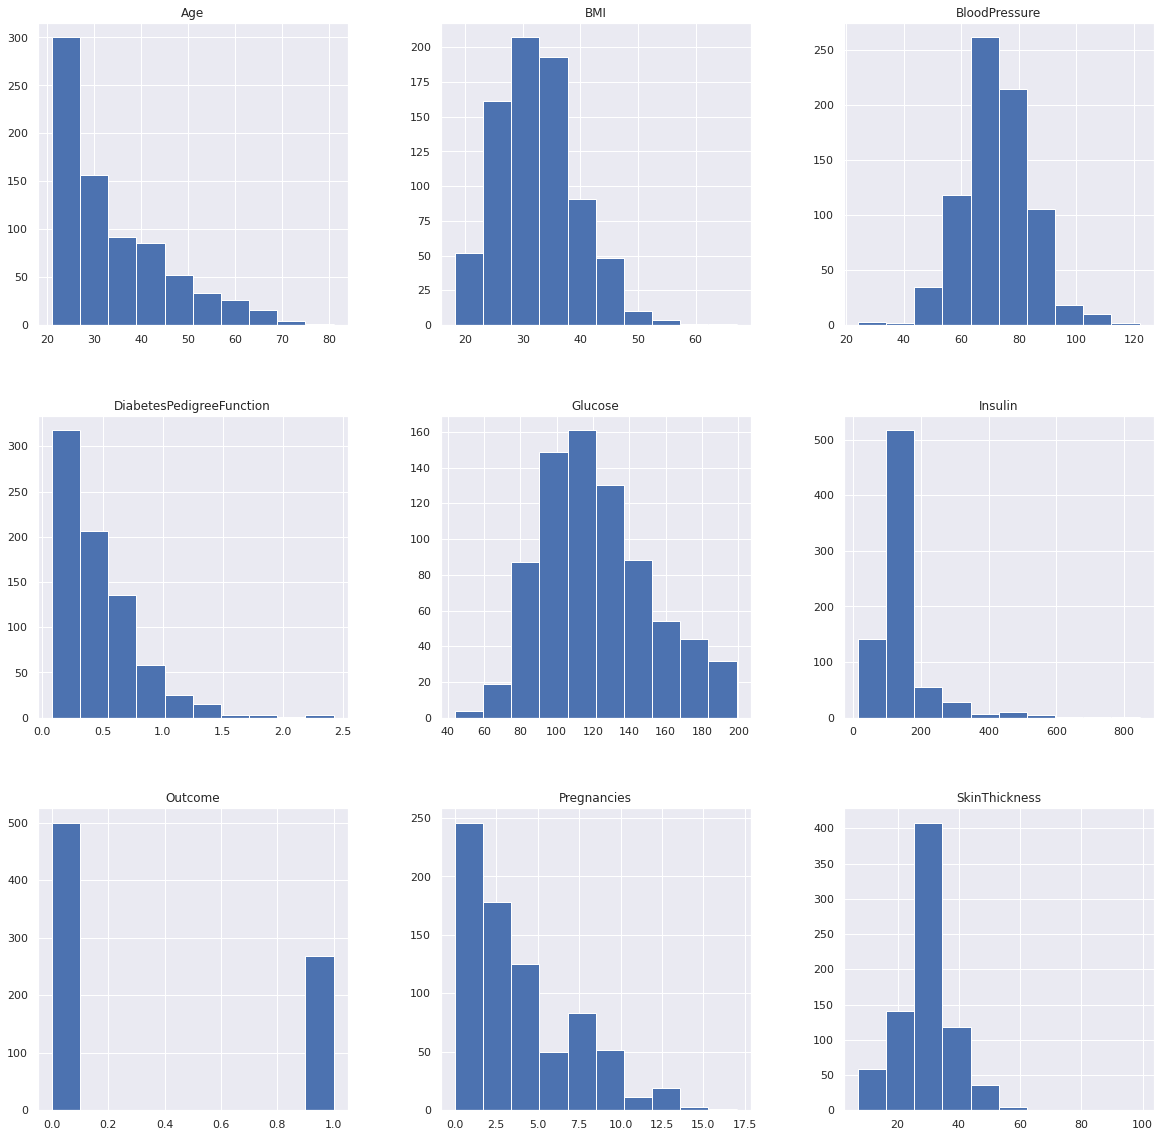

In [35]:
dfcopy.hist(figsize = (20,20))
plt.show()

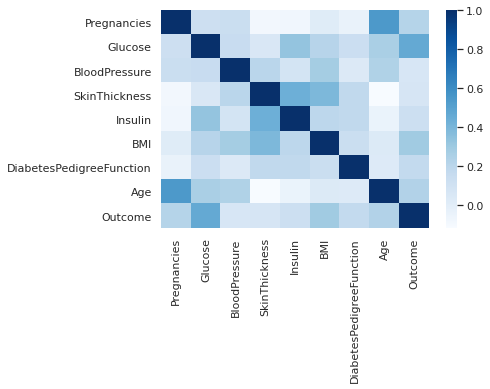

In [7]:
sns.heatmap(df.corr(), cmap='Blues')

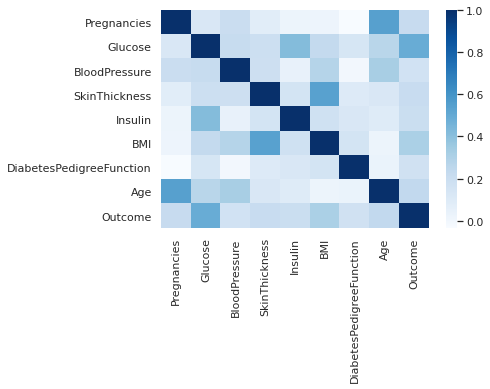

In [8]:
sns.heatmap(dfcopy.corr(), cmap='Blues')

In [11]:
col = 'Outcome'

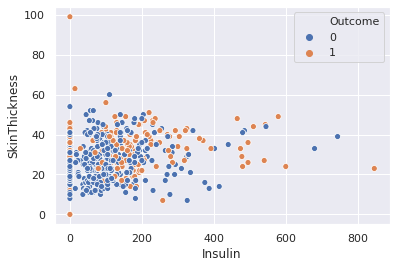

In [36]:
sns.scatterplot(x='Insulin', y='SkinThickness', data=df, hue=col)

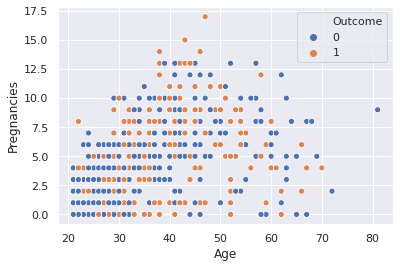

In [37]:
sns.scatterplot(x='Age', y='Pregnancies', data=df, hue=col)

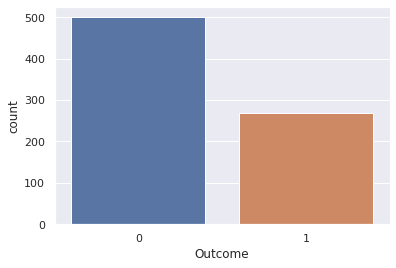

In [38]:
sns.countplot(df['Outcome'])

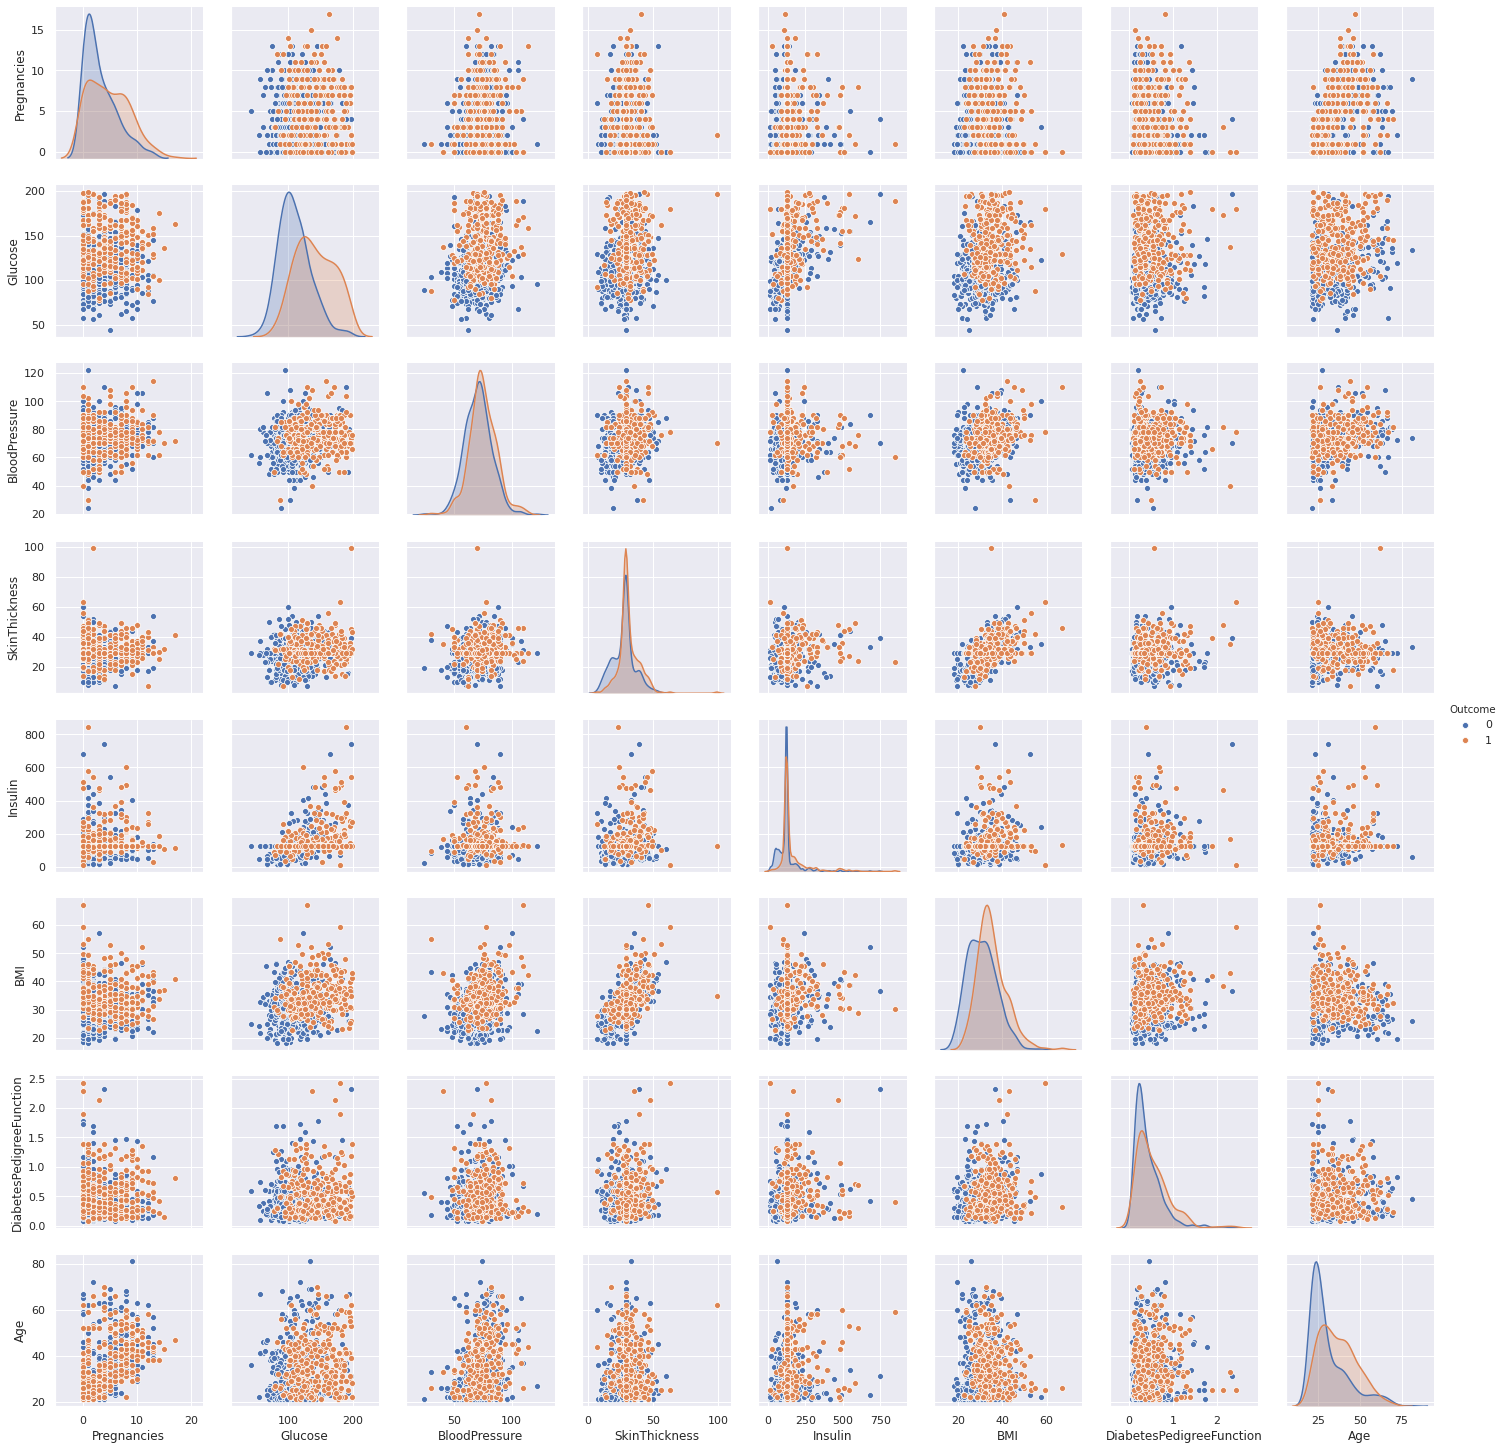

In [41]:
sns.pairplot(dfcopy, hue='Outcome')

I have the used the Min Max scaler since it is more robust to outliers that the standard scaler.
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQBfejbXDJOx5SaiPbWx6ShhAwARBUcWvTd8A&usqp=CAU)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
X =  pd.DataFrame(scaler.fit_transform(dfcopy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [14]:
y = dfcopy.Outcome

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

We had already seen that the representation of positive samples were much less than the negative once. Hence we shall use stratified sampling to split the dataset.
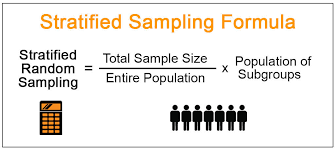

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

1. Logistic Regresion

In [18]:
model = LogisticRegression()
solvers = ['newton-cg', 'saga', 'liblinear']
penalty = ['l2', 'l1']
c_values = [5, 10, 1.0, 0.1, 0.01, 0.05]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [19]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.785847 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776536 (0.013684) with: {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776536 (0.013684) with: {'C': 5, 'penalty': 'l2', 'solver': 'saga'}
0.782123 (0.016446) with: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 5, 'penalty': 'l1', 'solver': 'newton-cg'}
0.780261 (0.018991) with: {'C': 5, 'penalty': 'l1', 'solver': 'saga'}
0.780261 (0.018991) with: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
0.780261 (0.014663) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.780261 (0.014663) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.782123 (0.015801) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.776536 (0.018246) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.776536 (0.018246) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.785847 (0.011479) with: {'C': 1.0, 'pena

In [61]:
best_model1 = LogisticRegression(C=1.0, solver='newton-cg', penalty = 'l2')
best_model1.fit(X_train, y_train)
y_pred = best_model1.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, classification_report

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  20]
 [ 40  41]]
Accuracy of our model is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [62]:
lr_acc = accuracy_score(y_test, y_pred)

In [24]:
y_proba = best_model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

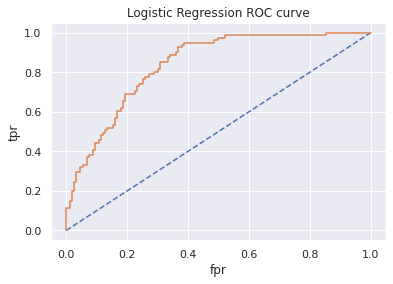

In [26]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Log-Reg')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [27]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba)

0.8381893004115225

2. KNN

In [37]:
param_grid = {'n_neighbors':np.arange(1,20), 'algorithm':['auto', 'kd_tree', 'brute']}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [38]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7616387337057727
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 13}


In [63]:
best_model2 = KNeighborsClassifier(13)
best_model2.fit(X_train,y_train)
y_pred = best_model2.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129  21]
 [ 41  40]]
Accuracy of our model is:  0.7316017316017316
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



In [65]:
knn_acc = accuracy_score(y_test, y_pred)

0.8123045267489711


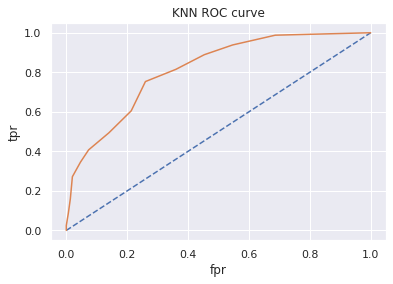

In [43]:
y_proba = best_model2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print(roc_auc_score(y_test,y_proba))

plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='KNN - 13')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

3. Random Forests Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [47]:
n_estimators = [200, 300, 400, 500]
max_depth = [4,6,5,7, 8]
min_samples_split = [6,8,9,7,10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


In [48]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: 0.767225 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 400}


In [49]:
rf_best = RandomForestClassifier(max_depth= 7, min_samples_split= 10, n_estimators= 400)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[131  19]
 [ 37  44]]
Accuracy of our model is:  0.7575757575757576


In [66]:
rf_acc = accuracy_score(y_test, y_pred)

Text(0.5, 0, 'index of the feature')

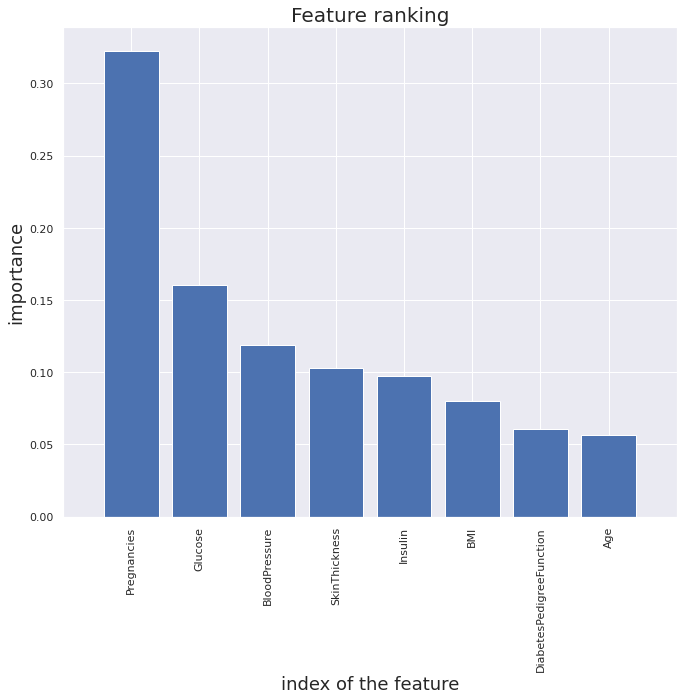

In [51]:
importance = rf_best.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns # e.g. ['A', 'B', 'C', 'D', 'E']

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names ,rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

4. Support vector Classifiers

In [54]:
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [100, 50, 75], 
            'gamma': [ 0.1,0.5, 0.01, 0.001], 
            'kernel': ['linear','rbf', 'poly','sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.810, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.765, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.749, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.821, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.793, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.765, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=100, gamma=0.5, kernel=linear, score=0.749, total=   0.0s
[CV] C=100, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.5, kernel=rbf, score=0.749, total=   0.0s
[CV] C=100, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.5, kernel=rbf, score=0.749, total=   0.0s
[CV] C=100, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.5, kernel=rbf, score=0.743, total=   0.0s
[CV] C=100, gamma=0.5, kernel=poly ...................................
[CV] ....... C=100, gamma=0.5, kernel=poly, score=0.771, total=   0.0s
[CV] C=100, gamma=0.5, kernel=poly ...................................
[CV] ....... C=100, gamma=0.5, kernel=poly, score=0.771, total=   0.0s
[CV] C=100, gamma=0.5, kernel=poly ...................................
[CV] ....... C=100, gamma=0.5, kernel=poly, score=0.765, total=   0.0s
[CV] C=100, gamma=0.5, kernel=sigmoid ................................
[CV] .

[CV] .... C=50, gamma=0.01, kernel=sigmoid, score=0.754, total=   0.0s
[CV] C=50, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=50, gamma=0.01, kernel=sigmoid, score=0.771, total=   0.0s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV] .... C=50, gamma=0.001, kernel=linear, score=0.810, total=   0.0s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV] .... C=50, gamma=0.001, kernel=linear, score=0.760, total=   0.0s
[CV] C=50, gamma=0.001, kernel=linear ................................
[CV] .... C=50, gamma=0.001, kernel=linear, score=0.749, total=   0.0s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.001, kernel=rbf, score=0.665, total=   0.0s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.001, kernel=rbf, score=0.670, total=   0.0s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.8s finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 50, 75], 'gamma': [0.1, 0.5, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [55]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [67]:
svc = SVC(C=100, gamma=0.1)
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.1)

In [68]:
y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[129  21]
 [ 44  37]]
Accuracy of our model is:  0.7186147186147186


In [69]:
svc_acc = accuracy_score(y_test, y_pred)

In [60]:
m1 = 'Logistic Regression'
m2 = 'K Nearest Neighbours'
m3 = 'Random Forests'
m4 = 'Support Vector Classifiers'

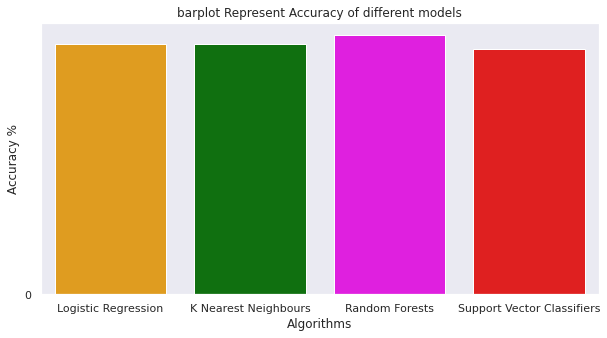

In [70]:
colors = ["orange", "green", "magenta", "red"]
acc = [lr_acc,knn_acc,rf_acc, svc_acc]
m = [m1,m2,m3, m4]
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.title("barplot Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot( y=acc,x=m, palette=colors)
plt.show()